<a href="https://colab.research.google.com/github/bhatihamzaa/Speech-to-text-/blob/main/Hamza_Bhati_Speech_to_text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install google-cloud-speech

In [2]:
import os
import pprint
from google.cloud import storage
from google.cloud import speech

In [11]:
# Load your Service Account
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "asmn5015-s24-ic-a.json"

In [12]:
def list_blobs(bucket_name):
    """Lists all the blobs in the bucket."""
    # bucket_name = "your-bucket-name"

    storage_client = storage.Client()

    # Note: Client.list_blobs requires at least package version 1.17.0.

    # Note: The call returns a response only when the iterator is consumed.
    return storage_client.list_blobs(bucket_name)

In [13]:
def extract_audio_gcs(gcs_uri):
    """Asynchronously transcribes the audio file specified by the gcs_uri."""

    client = speech.SpeechClient()

    audio = speech.RecognitionAudio(uri=gcs_uri)
    config = speech.RecognitionConfig(
        encoding=speech.RecognitionConfig.AudioEncoding.LINEAR16,
        audio_channel_count=2,
        language_code="en-US",
    )

    operation = client.long_running_recognize(config=config, audio=audio)

    print("Waiting for operation to complete...")

    return operation.result(timeout=150)

In [15]:
# Main
bucket_name = "hamza_bhati_2024"
blobs = list_blobs(bucket_name)
for blob in blobs:
    print(blob.name)

# Create audio file URI
gcs_uri = "gs://" + bucket_name + "/" + blob.name
print("\nThis is the uri: {}".format(gcs_uri))

Chat with new friends ｜ Learn English conversation.wav

This is the uri: gs://hamza_bhati_2024/Chat with new friends ｜ Learn English conversation.wav


In [17]:
# Extract text from audio file
response = extract_audio_gcs(gcs_uri=gcs_uri)
pprint.pprint(response)

# Access each response element
print("Accessing each element:")

data = []

for result in response.results:
  data.append({
        'transcript': result.alternatives[0].transcript,
        'confidence': result.alternatives[0].confidence,
        })

pprint.pprint(data)

Waiting for operation to complete...
results {
  alternatives {
    transcript: "hello my name is Andrea Hi how are you doing"
    confidence: 0.9604142904281616
  }
  result_end_time {
    seconds: 17
    nanos: 790000000
  }
  language_code: "en-us"
}
results {
  alternatives {
    transcript: " I am okay thank you where do you live I live in Alabama nice I live Colorado"
    confidence: 0.9693808555603027
  }
  result_end_time {
    seconds: 30
    nanos: 510000000
  }
  language_code: "en-us"
}
results {
  alternatives {
    transcript: " how long do you live there I live there for 11 years"
    confidence: 0.9737687110900879
  }
  result_end_time {
    seconds: 37
    nanos: 880000000
  }
  language_code: "en-us"
}
results {
  alternatives {
    transcript: " do you live alone or with your family I live with my wife really nice I live with sisters how many sisters do you have I have three sisters"
    confidence: 0.9767171740531921
  }
  result_end_time {
    seconds: 55
    nanos

In [23]:
import pandas as pd
#Saving The extracted Audio
df = pd.DataFrame(data)
df.to_csv('HB_audio.csv', index=False)


In [24]:
# Install the google-cloud-language package
!pip install google-cloud-language

# Imports the Google Cloud client library
from google.cloud import language_v1

# Instantiates a client
client = language_v1.LanguageServiceClient()

In [25]:
# Load the existing CSV file
df_extract = pd.read_csv('/content/HB_audio.csv')
df_extract['transcript'] = df_extract['transcript'].astype(str)

In [26]:
# Detects the sentiment of the text
def analyze_sentiment(text):
    document = language_v1.Document(content=text, type_=language_v1.Document.Type.PLAIN_TEXT)
    sentiment = client.analyze_sentiment(request={"document": document}).document_sentiment
    return sentiment.score, sentiment.magnitude

In [31]:
# Add sentiment and magnitude to each sentence
df_extract['sentiment'] = None
df_extract['magnitude'] = None
# Create the 'sentence_number' column if it doesn't exist
df_extract['sentence_number'] = 0 # Initialize with zeros or any default value

for index, row in df_extract.iterrows():
    text = row['transcript']
    sentiment_score, sentiment_magnitude = analyze_sentiment(text)
    df_extract.iloc[index, df_extract.columns.get_loc('sentence_number')] = index + 1 # Now this line should work
    df_extract.at[index, 'sentiment'] = sentiment_score
    df_extract.at[index, 'magnitude'] = sentiment_magnitude

In [33]:
# Updating the Dataframe
# Check the actual column names in your DataFrame
print(df_extract.columns)

# Adjust the list of columns to include only existing ones
df_extract_updated = ['transcript', 'confidence', 'sentiment', 'magnitude', 'sentence_number'] # Corrected list of columns
df_extract = df_extract[df_extract_updated]

Index(['transcript', 'confidence', 'sentiment', 'magnitude',
       'sentence_number'],
      dtype='object')


In [34]:
# Display the updated DataFrame
print(df_extract.head())

                                          transcript  confidence sentiment  \
0       hello my name is Andrea Hi how are you doing    0.960414       0.0   
1   I am okay thank you where do you live I live ...    0.969381       0.8   
2   how long do you live there I live there for 1...    0.973769       0.0   
3   do you live alone or with your family I live ...    0.976717       0.8   
4   how long have you been married I have been ma...    0.949678       0.2   

  magnitude  sentence_number  
0       0.0                1  
1       0.8                2  
2       0.0                3  
3       0.8                4  
4       0.2                5  


In [35]:
# Save the updated DataFrame
df_extract.to_csv('HB_sentiment.csv', index=False)

----------------------------------

In [37]:
!pip install --upgrade firebase-admin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.3/126.3 kB 1.4 MB/s eta 0:00:00
  Attempting uninstall: pyjwt
    Found existing installation: PyJWT 2.3.0
    Uninstalling PyJWT-2.3.0:
      Successfully uninstalled PyJWT-2.3.0
  Attempting uninstall: firebase-admin
    Found existing installation: firebase-admin 5.3.0
    Uninstalling firebase-admin-5.3.0:
      Successfully uninstalled firebase-admin-5.3.0


In [38]:
!pip show google-cloud-firestore

Name: google-cloud-firestore
Version: 2.11.1
Summary: Google Cloud Firestore API client library
Home-page: https://github.com/googleapis/python-firestore
Author: Google LLC
Author-email: googleapis-packages@google.com
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: google-api-core, google-cloud-core, proto-plus, protobuf
Required-by: firebase-admin


In [39]:
import os
import firebase_admin
from firebase_admin import credentials
from firebase_admin import firestore

In [40]:
# Use a service account.
cred = credentials.Certificate('asmn5015-s24-ic-a.json')
app = firebase_admin.initialize_app(cred)
db = firestore.client()

In [41]:
#Add Data
def store_data_in_firestore(df_extract, collection_name="HB_speech_analysis"):
    counter = 0
    # Use a write batch
    batch = db.batch()

    for index, row in df_extract.iterrows():
        data_dict = row.to_dict()

        doc_ref = db.collection(collection_name).document(f"transcript_{counter}")
        batch.set(doc_ref, data_dict)

        # Increment counter for next document
        counter += 1

    try:
        batch.commit()
        print(f'Data uploaded successfully!')
    except Exception as e:
        print(f'Error uploading data: {e}')

In [47]:
# Store the Data into Firebase Database
store_data_in_firestore(df_extract)

Data uploaded successfully!


In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
# Load the CSV file
df_audio = pd.read_csv('HB_sentiment.csv')

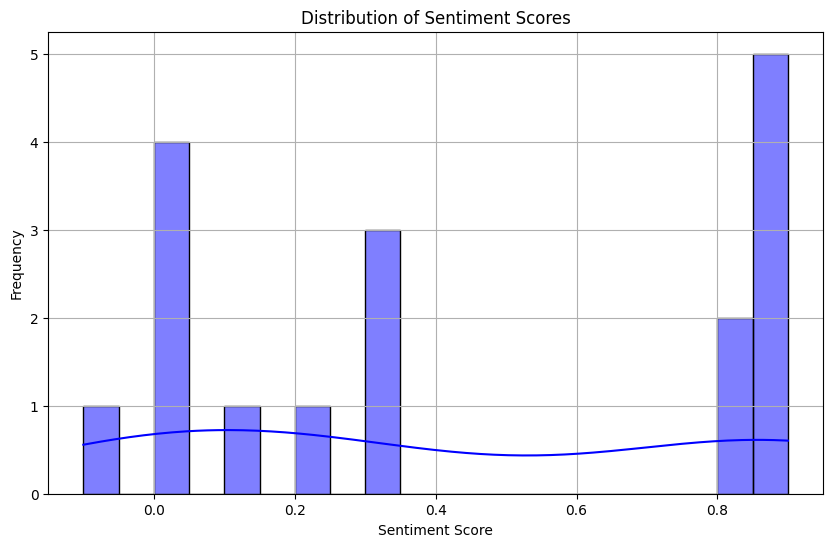

In [53]:
# Visualization 1: Sentiment Score Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_audio['sentiment'], bins=20, kde=True, color='blue')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

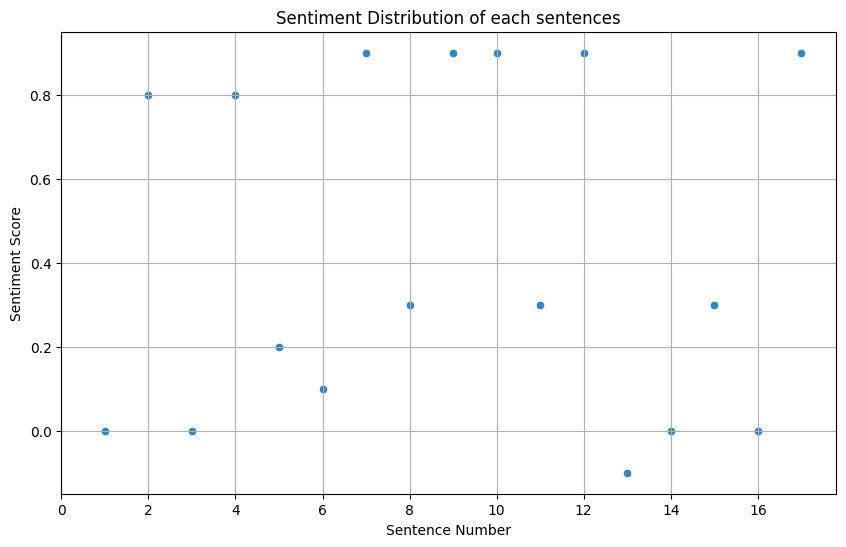

In [54]:
# Visualization 3: Sentiment of each sentences
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sentence_number', y='sentiment', data=df_audio, alpha=0.9)
plt.title('Sentiment Distribution of each sentences')
plt.xticks(range(0, len(df_audio), 2))
plt.xlabel('Sentence Number')
plt.ylabel('Sentiment Score')
plt.grid(True)
plt.show()

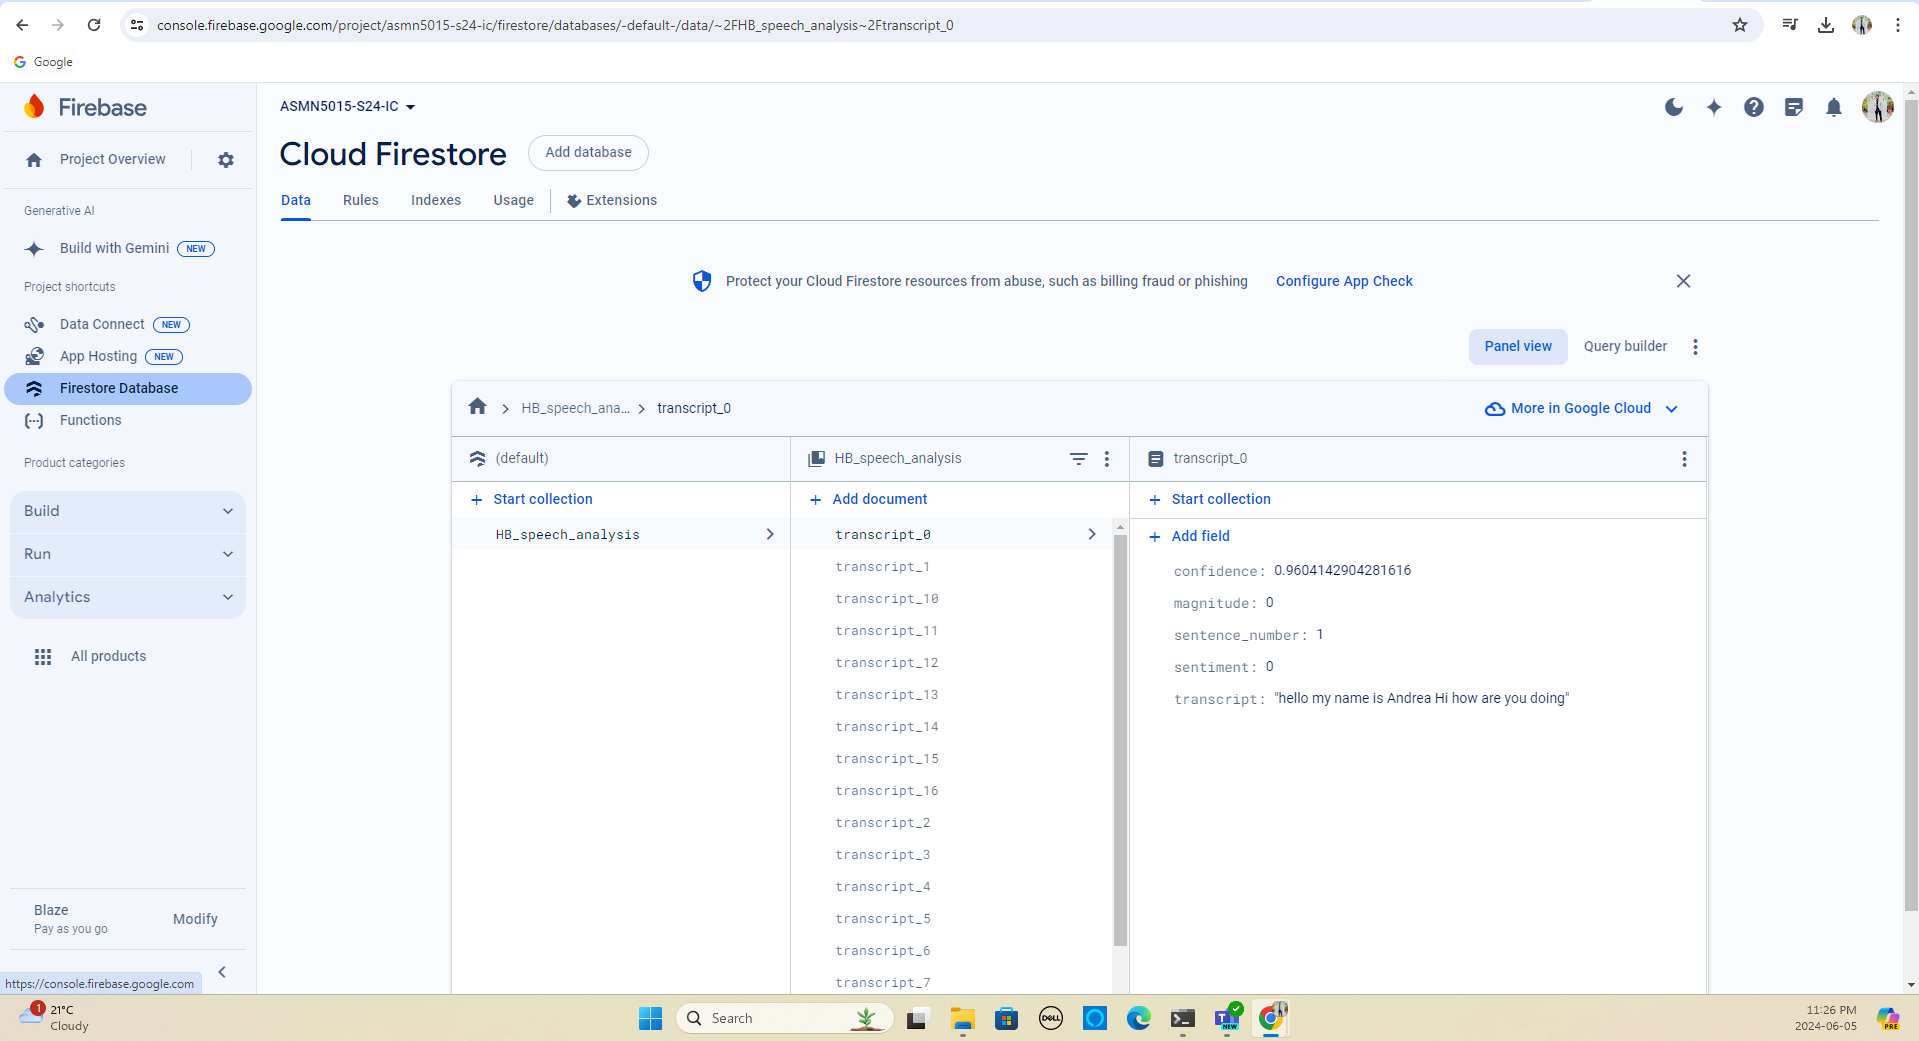


**Findings from Sentiment Analysis**

1.** Distribution of Sentiment Scores Overview: **



The histogram of sentiment scores indicates that the sentiment of the transcribed sentences is varied, with scores distributed across the spectrum.
Details:
There are peaks at the sentiment scores of approximately 0.0 and 0.8.
Sentiment scores close to 0.0 are more frequent, indicating a significant number of neutral or slightly positive/negative sentiments.
Positive sentiments (around 0.8) also show a notable frequency, suggesting a generally positive tone in many parts of the conversation.



2.** Sentiment Distribution Across Sentences Overview:**

The scatter plot of sentiment scores per sentence shows how sentiment varies throughout the conversation.
Details:
The sentiment scores fluctuate between 0.0 and 0.8 for most of the sentences.
Several sentences have high sentiment scores (around 0.8), indicating positive interactions at these points.
There are also sentences with neutral or no strong sentiment (scores close to 0.0), indicating factual or non-emotional content.



**Summary**

The conversation contains a mix of neutral and positive sentiments, with a few instances of high positive sentiment.
The sentiment analysis reveals that the dialogue has varying emotional tones, with no strong negative sentiments detected.
These findings can help understand the overall tone of the conversation and identify specific parts where emotions were more pronounced.